# José Ligorría
##  KMeans

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('C:/Users/jose-/Documents/Maestria/Statistical_Learning2/Practica1/estaturas.csv')

In [3]:
data.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


Normalizamos las observaciones

In [4]:
Columns_name = list(data.columns)

In [5]:
dataset = data.copy()
for i in Columns_name:
    dataset[i] = (data[i] - np.mean(data[i]))/np.std(data[i])

In [12]:
def Hard_Kmeans(dataset,k = 5,seed = 1):
    n_obs = len(data)
    centroids = dataset.sample(n = k, random_state = seed)
    n_iter = 0
    #tmp = datetime.now()
    while n_iter < 100: 
        n_iter += 1
        dist = pd.DataFrame(index=dataset.index)
        for i in range(k):
            piv_centroid = np.array(centroids.iloc[i])
            piv_df = (dataset-piv_centroid)**2
            piv_df = pd.DataFrame({i:piv_df.sum(axis=1)})
            dist = dist.join(piv_df)    
            #print(piv_centroid)
        min_dists = np.array(dist.min(axis=1))
        cost = np.mean(min_dists)
        centroids_list = np.array(dist.idxmin(axis=1))
        new_centroids = pd.DataFrame(index=list(range(k)), columns=['Estatura','Edad']).fillna(0)
        for i in range(k):
            piv_list = np.array(range(n_obs))[centroids_list==i]
            #print(piv_list)
            #print(i,len(piv_list))
            new_centroids.iloc[i] = dataset.iloc[piv_list].mean()
        df = pd.concat([centroids, new_centroids])
        df = df.reset_index(drop=True)
        df_gpby = df.groupby(list(df.columns))
        idx = [x[0] for x in df_gpby.groups.values() if len(x) == 2]
        if n_iter % 5 ==0:
            print('vamos por la iteracion ', n_iter, ' con los centroides: ',centroids)
        if len(idx) == k:
            break
        centroids = new_centroids
    #tmp-datetime.now()
    return cost,centroids,centroids_list

In [16]:
cost1,centroids1,centroids_list1 = Hard_Kmeans(dataset,k=2)
cost2,centroids2,centroids_list2 = Hard_Kmeans(dataset,k=3)
cost3,centroids3,centroids_list3 = Hard_Kmeans(dataset,k=4)
cost4,centroids4,centroids_list4 = Hard_Kmeans(dataset,k=5)
cost5,centroids5,centroids_list5 = Hard_Kmeans(dataset,k=6)

In [17]:
cost1,cost2,cost3,cost4,cost5

(1.212397359623414,
 0.5426103757551495,
 0.45863203589820195,
 0.4128993433946882,
 0.3053226090620766)

In [35]:
np_dataset = np.array(dataset)
kmeans = KMeans(n_clusters = 6,random_state = 0).fit(np_dataset)
kmeans.labels_
kmeans.cluster_centers_
for i in range(6):
    


array([[ 0.15861298, -0.75552316],
       [ 0.85291886,  1.96061382],
       [-0.90454289, -0.3571564 ],
       [-0.03666055,  0.98280451],
       [ 1.11328356, -0.75552316],
       [-2.27145759, -0.28472608]])

In [37]:
centroids5

,Estatura,Edad
0,1.113284,-0.755523
1,0.527463,2.322765
2,-1.360181,-0.315768
3,0.657645,0.964697
4,-0.448905,1.091450
5,0.071825,-0.719308


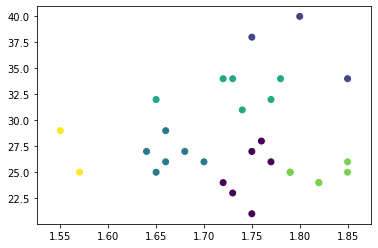

In [34]:
colors = cm.rainbow(np.linspace(0, 1, 6))
plt.scatter(data['Estatura'], data['Edad'],c = kmeans.labels_)

In [10]:
data

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21
